In [1]:
import json
import requests
import time
import pandas as pd

import os
from os.path import join, dirname
from dotenv import load_dotenv


dotenv_path = join(dirname(os.path.dirname('__file__')), '.env')
load_dotenv(dotenv_path)

from sqlalchemy import create_engine

# build connecting string from .env
DATABASE_NAME = os.getenv("BIG_BOY_DB_NAME")
DATABASE_USER = os.getenv("BIG_BOY_DB_USER")
DATABASE_PASSWORD = os.getenv("BIG_BOY_DB_PASSWORD")
DATABASE_HOST = os.getenv("BIG_BOY_DB_HOST")
DATABASE_PORT = "5432"

connection = "postgresql://"+DATABASE_USER+":"+DATABASE_PASSWORD+"@"+DATABASE_HOST+":"+DATABASE_PORT+"/"+DATABASE_NAME
connection_oxcart = "postgresql://"+DATABASE_USER+":"+DATABASE_PASSWORD+"@"+DATABASE_HOST+":"+DATABASE_PORT+"/oxcart"

conn = create_engine(connection) 
conn_oxcart = create_engine(connection_oxcart)

In [2]:
arbitrum_proposals = pd.read_sql_query("""select * from snapshot.proposallist WHERE dao_id = 'arbitrumfoundation.eth';""",con=conn)
arbitrum_proposals

,dao_id,proposal_id,created,title,body,choices,start,ends,snapshot,state,...,plugins,network,votes,discussion,ipfs,quorum,app,link,privacy,flagged
0,arbitrumfoundation.eth,0xe968af3f6b06d386958e513c2285f72f7172aabd2661...,1.699724e+09,Funding Gas Rebate and Trading Competition Pro...,Abstract:\nThis Arbitrum Improvement Proposal ...,"[Fund (1.5m arb), Do Not Fund]",1699724106,1700328906,149430525,closed,...,{},42161,38359,https://forum.arbitrum.foundation/t/proposal-f...,bafkreidz7b7iyqcnulelgnsf6ikf6xpuqablgzbzmmmox...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
1,arbitrumfoundation.eth,0x6a578c12950f9367d2530b0324f06835bf9df5b957ad...,1.694022e+09,Domain Allocator Election for the Dev Tooling ...,**Introduction:** This is a vote to elect the ...,"[Juandi, Hiko, Shlok Mange]",1694022217,1694627017,128642925,closed,...,{},42161,49409,,bafkreibpl6ofgwrfwgafrpgaorodcllenpccpgmwjbwo6...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
2,arbitrumfoundation.eth,0x84e841ad47a5ac7eae2c8ee87c05abc381f8e724598d...,1.694023e+09,"Domain Allocator Election for the Education, C...",**Introduction:** This is a vote to elect the ...,"[Jengajojo, Oyeniyi Abiola Peace, Steve, Dumbi...",1694022779,1694627579,128644783,closed,...,{},42161,50003,,bafkreifu26eqfidtlcim46gqeavcplri43k67m7ixjdpq...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
3,arbitrumfoundation.eth,0x029f9208ec4560c5c4868bcf1a5633ffb15aa69f5000...,1.696552e+09,SpartaDEX STIP Proposal - Round 1,This is a proposal for the [Arbitrum Short-Ter...,"[For, Against, Abstain]",1696557600,1697162400,137913872,closed,...,{},42161,18001,https://forum.arbitrum.foundation/t/spartadex-...,bafkreifcfbcoqgd3kueec4itmzl3nmhosqabkap6dguha...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
4,arbitrumfoundation.eth,0x0908edd135f544cdf93dd628bf9813b0f3af517c6d87...,1.696552e+09,RabbitHole STIP Proposal - Round 1,This is a proposal for the [Arbitrum Short-Ter...,"[For, Against, Abstain]",1696557600,1697162400,137914801,closed,...,{},42161,18303,https://forum.arbitrum.foundation/t/rabbithole...,bafkreic7ubefjzb4oajzdkqq3yenpxs3tgfxjrxfza5rc...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,arbitrumfoundation.eth,0x4f6f6c1ba11de1122d5d5b8b098999610920fdc9c61a...,1.718921e+09,Multisig Support Service (MSS) Elections,The application period for the MSS has officia...,"[PGov, Dylan Brodeur / Limes.eth, JoJo, Westie...",1718920992,1719525792,223960708,active,...,{},42161,35,,bafkreiammxkbr4znoqsdnawbgkw76yevqurlssv26y4di...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
315,arbitrumfoundation.eth,0xdc8ec106f526902d3cf15757f014b0db627ff974f40e...,1.719963e+09,Subsidy Fund Proposal from the Arbitrum DAO Pr...,# Executive Summary\n\nAs voted on in the ADPC...,"[For, Against, Abstain]",1719962582,1720567382,228138157,active,...,{},42161,14,https://forum.arbitrum.foundation/t/non-consti...,bafkreiebxj72xcerzb5lm3p4d3ieengbbkst2b55zpvuu...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
316,arbitrumfoundation.eth,0xd6138aaca39742a1a56f3219a74a4258e0786aa5494c...,1.721854e+09,Change Arbitrum Expansion Program to allow de...,"On the 18th of January 2024, the Arbitrum Foun...","[FOR: Any blockchain network, AGAINST: Only Et...",1721854345,1722459145,235677312,active,...,{},42161,61,https://forum.arbitrum.foundation/t/temperatur...,bafkreie435hmy6v2mva7tmnmholzfvy4ndaoffrndctre...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
317,arbitrumfoundation.eth,0x0e646ace733f4a098ac7036dbadad8465ea65c8e3c48...,1.723741e+09,Proposal to Temporary Extend Delegate Incentiv...,### Abstract\n\nWe would like to introduce a t...,"[For, Against, Abstain]",1723740761,1724345561,243181177,active,...,{},42161,74,https://forum.arbitrum.foundation/t/proposal-t...,bafkre

In [3]:
# get arbitrum top delegates
top_delegates_query = """
    SELECT * FROM arbitrum.top_delegates WHERE delegate_rank is not null;
"""
top_delegates_df = pd.read_sql(top_delegates_query, conn)

In [4]:
top_delegates_df

,address,name,vp,delegate_rank
0,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,delegate.l2beat.eth,18838105,1
1,0xf4b0556b9b6f53e00a1fdd2b0478ce841991d8fa,olimpio.eth,15358347,3
2,0xb933aee47c438f22de0747d57fc239fe37878dd1,wintermutegovernance.eth,14405315,4
3,0x0eb5b03c0303f2f47cd81d7be4275af8ed347576,TreasureDAO,14108091,5
4,0xf92f185abd9e00f56cb11b0b709029633d1e37b4,Coinflipcanada,12471044,6
...,...,...,...,...
295,0xdd5905172a02fa66b45188ff70f03cca0628164d,None,710266,54
296,0x5180db0237291a6449dda9ed33ad90a38787621c,None,635609,56
297,0xb4c064f466931b8d0f637654c916e3f203c46f13,None,517730,64
298,0x98033efb9125333f4f6353bcc5e2d0ae06b436a2,None,477969,65


In [5]:
proposal_query = "SELECT * FROM snapshot.proposallist WHERE dao_id = 'arbitrumfoundation.eth'"
proposal_df = pd.read_sql_query(proposal_query, conn)
arbitrum_votes = f"""
    SELECT * from snapshot.votelist where proposal IN {tuple(proposal_df['proposal_id'])} AND lower(voter) IN {tuple(top_delegates_df['address'])};
"""
arbitrum_votes_df = pd.read_sql_query(arbitrum_votes, conn)
# remove vote_id, app, reason, typename
arbitrum_votes_df = arbitrum_votes_df.drop(columns=['vote_id', 'app', 'reason', 'typename'])
# join proposals on proposal and proposal_id
arbitrum_votes_and_proposals = pd.merge(arbitrum_votes_df, proposal_df, left_on='proposal', right_on='proposal_id')
# drop proposal_id, plugins, discussion, ipfs, app, link, privacy, flagged
arbitrum_votes_and_proposals = arbitrum_votes_and_proposals.drop(columns=['proposal_id', 'plugins', 'discussion', 'ipfs', 'app', 'link', 'privacy', 'flagged'])
# drop created_x; rename created_y to created
arbitrum_votes_and_proposals = arbitrum_votes_and_proposals.drop(columns=['created_y'])
arbitrum_votes_and_proposals = arbitrum_votes_and_proposals.rename(columns={'created_x':'created'})
# clone df with proposal_id, voter, vp, choice, created
arbitrum_votes_and_proposals_clone = arbitrum_votes_and_proposals.copy()
arb_votes_shallow = arbitrum_votes_and_proposals_clone[['proposal', 'voter', 'vp', 'choice', 'created']]
arb_votes_shallow

,proposal,voter,vp,choice,created
0,0x3ae4c725f7cb82d450b6fe8517178b2a0a51d1105bea...,0xF0ea58b65c82c48ce69f0ABD68D178e7764C4bA2,1.102560e+06,1,1.680935e+09
1,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0x5f38BB373dccB91AD9Fd3727C2b9BaF6DF9332D3,4.261503e+05,1,1.680162e+09
2,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0xA5dF0cf3F95C6cd97d998b9D990a86864095d9b0,2.182912e+06,2,1.680281e+09
3,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0x6f9BB7e454f5B3eb2310343f0E99269dC2BB8A1d,3.241758e+05,2,1.680310e+09
4,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0xE93D59CC0bcECFD4ac204827eF67c5266079E2b5,1.469001e+06,2,1.680322e+09
...,...,...,...,...,...
7360,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,0x617512FA7d3fd26bdA51b9Ac8c23b04a48D625f1,5.207288e+05,1,1.723816e+09
7361,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,0x070341aA5Ed571f0FB2c4a5641409B1A46b4961b,1.910238e+05,1,1.723838e+09
7362,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,0x5f38BB373dccB91AD9Fd3727C2b9BaF6DF9332D3,1.567341e+05,3,1.724101e+09
7363,0xbbec2fbf891d9abb21e8be380f79806519df8294d1d2...,0x839395e20bbB182fa440d08F850E6c7A8f6F0780,6.203621e+06,"[1, 2, 3]",1.723836e+09


In [6]:
# get count of votes each delegate has made
votes_per_delegate = arb_votes_shallow['voter'].value_counts().reset_index()
votes_per_delegate.columns = ['delegate', 'votes']
votes_per_delegate

,delegate,votes
0,0xf3FE8c6c75bE4afB2F8200Fc77339abE4D7CFF33,253
1,0x6f9BB7e454f5B3eb2310343f0E99269dC2BB8A1d,247
2,0x5f38BB373dccB91AD9Fd3727C2b9BaF6DF9332D3,234
3,0xAD16ebE6FfC7d96624A380F394cD64395B0C6144,220
4,0xea172676E4105e92Cc52DBf45fD93b274eC96676,218
...,...,...
78,0x7AE109A63ff4DC852e063a673b40BED85D22E585,2
79,0xdd5905172A02FA66B45188Ff70F03CcA0628164d,1
80,0xc3A48B40b3762924D6fa3af1D957cE78E522497E,1
81,0x98033EFB9125333f4F6353BcC5e2D0Ae06b436a2,1


In [7]:
# join top_delegates with votes_per_delegate without case
top_delegates_df['address'] = top_delegates_df['address'].str.lower()
votes_per_delegate['delegate'] = votes_per_delegate['delegate'].str.lower()
top_delegates_with_votes = pd.merge(top_delegates_df, votes_per_delegate, left_on='address', right_on='delegate')
top_delegates_with_votes


,address,name,vp,delegate_rank,delegate,votes
0,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,delegate.l2beat.eth,18838105,1,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,200
1,0xf4b0556b9b6f53e00a1fdd2b0478ce841991d8fa,olimpio.eth,15358347,3,0xf4b0556b9b6f53e00a1fdd2b0478ce841991d8fa,213
2,0xb933aee47c438f22de0747d57fc239fe37878dd1,wintermutegovernance.eth,14405315,4,0xb933aee47c438f22de0747d57fc239fe37878dd1,86
3,0x0eb5b03c0303f2f47cd81d7be4275af8ed347576,TreasureDAO,14108091,5,0x0eb5b03c0303f2f47cd81d7be4275af8ed347576,195
4,0xf92f185abd9e00f56cb11b0b709029633d1e37b4,Coinflipcanada,12471044,6,0xf92f185abd9e00f56cb11b0b709029633d1e37b4,107
...,...,...,...,...,...,...
244,0xa71a021ef66b03e45e0d85590432dfcfa1b7174c,None,931604,52,0xa71a021ef66b03e45e0d85590432dfcfa1b7174c,32
245,0xdd5905172a02fa66b45188ff70f03cca0628164d,None,710266,54,0xdd5905172a02fa66b45188ff70f03cca0628164d,1
246,0x5180db0237291a6449dda9ed33ad90a38787621c,None,635609,56,0x5180db0237291a6449dda9ed33ad90a38787621c,18
247,0x98033efb9125333f4f6353bcc5e2d0ae06b436a2,None,477969,65,0x98033efb9125333f4f6353bcc5e2d0ae06b436a2,1


In [8]:
# transform arbitrum_proposals to have proposal, created
arbitrum_proposals_transformed = arbitrum_proposals[['proposal_id', 'created', 'ends']]
# rename created and ends to proposal_created and proposal_ends
arbitrum_proposals_transformed = arbitrum_proposals_transformed.rename(columns={'created':'proposal_created', 'ends':'proposal_ends'})
# rename created to vote_created
arb_votes_shallow = arb_votes_shallow.rename(columns={'created':'vote_created'})

# merge arb_votes_shallow on proposal and arbitrum_proposals on proposal_id only adding created from arbitrum_proposals
proposal_timing_votedf = arb_votes_shallow.merge(arbitrum_proposals_transformed, left_on='proposal', right_on='proposal_id')
proposal_timing_votedf


,proposal,voter,vp,choice,vote_created,proposal_id,proposal_created,proposal_ends
0,0x3ae4c725f7cb82d450b6fe8517178b2a0a51d1105bea...,0xF0ea58b65c82c48ce69f0ABD68D178e7764C4bA2,1.102560e+06,1,1.680935e+09,0x3ae4c725f7cb82d450b6fe8517178b2a0a51d1105bea...,1.680919e+09,1681523541
1,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0x5f38BB373dccB91AD9Fd3727C2b9BaF6DF9332D3,4.261503e+05,1,1.680162e+09,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,1.679955e+09,1680560004
2,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0xA5dF0cf3F95C6cd97d998b9D990a86864095d9b0,2.182912e+06,2,1.680281e+09,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,1.679955e+09,1680560004
3,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0x6f9BB7e454f5B3eb2310343f0E99269dC2BB8A1d,3.241758e+05,2,1.680310e+09,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,1.679955e+09,1680560004
4,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0xE93D59CC0bcECFD4ac204827eF67c5266079E2b5,1.469001e+06,2,1.680322e+09,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,1.679955e+09,1680560004
...,...,...,...,...,...,...,...,...
7360,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,0x617512FA7d3fd26bdA51b9Ac8c23b04a48D625f1,5.207288e+05,1,1.723816e+09,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,1.723759e+09,1724367600
7361,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,0x070341aA5Ed571f0FB2c4a5641409B1A46b4961b,1.910238e+05,1,1.723838e+09,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,1.723759e+09,1724367600
7362,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,0x5f38BB373dccB91AD9Fd3727C2b9BaF6DF9332D3,1.567341e+05,3,1.724101e+09,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,1.723759e+09,1724367600
7363,0xbbec2fbf891d9abb21e8be380f79806519df8294d1d2...,0x839395e20bbB182fa440d08F850E6c7A8f6F0780,6.203621e+06,"[1, 2, 3]",1.723836e+09,0xbbec2fbf891d9abb21e8be380f79806519df8294d1d2...,1.723768e+09,1724372523


In [9]:
# create new column that is the percentage of time that has passed since proposal was created between proposal_created and proposal_ends
proposal_timing_votedf['time_passed'] = (proposal_timing_votedf['vote_created'] - proposal_timing_votedf['proposal_created']) / (proposal_timing_votedf['proposal_ends'] - proposal_timing_votedf['proposal_created'])
proposal_timing_votedf

,proposal,voter,vp,choice,vote_created,proposal_id,proposal_created,proposal_ends,time_passed
0,0x3ae4c725f7cb82d450b6fe8517178b2a0a51d1105bea...,0xF0ea58b65c82c48ce69f0ABD68D178e7764C4bA2,1.102560e+06,1,1.680935e+09,0x3ae4c725f7cb82d450b6fe8517178b2a0a51d1105bea...,1.680919e+09,1681523541,0.026454
1,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0x5f38BB373dccB91AD9Fd3727C2b9BaF6DF9332D3,4.261503e+05,1,1.680162e+09,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,1.679955e+09,1680560004,0.341845
2,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0xA5dF0cf3F95C6cd97d998b9D990a86864095d9b0,2.182912e+06,2,1.680281e+09,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,1.679955e+09,1680560004,0.537933
3,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0x6f9BB7e454f5B3eb2310343f0E99269dC2BB8A1d,3.241758e+05,2,1.680310e+09,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,1.679955e+09,1680560004,0.586007
4,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0xE93D59CC0bcECFD4ac204827eF67c5266079E2b5,1.469001e+06,2,1.680322e+09,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,1.679955e+09,1680560004,0.605583
...,...,...,...,...,...,...,...,...,...
7360,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,0x617512FA7d3fd26bdA51b9Ac8c23b04a48D625f1,5.207288e+05,1,1.723816e+09,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,1.723759e+09,1724367600,0.092491
7361,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,0x070341aA5Ed571f0FB2c4a5641409B1A46b4961b,1.910238e+05,1,1.723838e+09,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,1.723759e+09,1724367600,0.129535
7362,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,0x5f38BB373dccB91AD9Fd3727C2b9BaF6DF9332D3,1.567341e+05,3,1.724101e+09,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,1.723759e+09,1724367600,0.561645
7363,0xbbec2fbf891d9abb21e8be380f79806519df8294d1d2...,0x839395e20bbB182fa440d08F850E6c7A8f6F0780,6.203621e+06,"[1, 2, 3]",1.723836e+09,0xbbec2fbf891d9abb21e8be380f79806519df8294d1d2...,1.723768e+09,1724372523,0.112908


In [10]:
# get mean time_passed for every delegate
mean_time_passed = proposal_timing_votedf.groupby('voter')['time_passed'].mean().reset_index()
# rename voter to delegate
mean_time_passed = mean_time_passed.rename(columns={'voter':'delegate'})
# delegate to lower case
mean_time_passed['delegate'] = mean_time_passed['delegate'].str.lower()
mean_time_passed

,delegate,time_passed
0,0x05bd5b09e673405e671493b24ecbf43188d5d4c3,0.184690
1,0x067b9bbbbc42d2ab9b9ab6bb62646daf7f344a76,0.461904
2,0x070341aa5ed571f0fb2c4a5641409b1a46b4961b,0.662166
3,0x0a9eeddaa65546ad35d3f0ac9e6f09575e4c9297,0.316419
4,0x0eb5b03c0303f2f47cd81d7be4275af8ed347576,0.834278
...,...,...
78,0xe876a94ebaa0d8d2da4142766d8c803a7c1d8ed8,0.549858
79,0xea172676e4105e92cc52dbf45fd93b274ec96676,0.512902
80,0xf3fe8c6c75be4afb2f8200fc77339abe4d7cff33,0.265556
81,0xf9473a70724b8f79c3ea108d5cb69d042c9fe76c,0.599145


In [11]:
top_delegates_adv = pd.merge(top_delegates_with_votes, mean_time_passed, left_on='address', right_on='delegate')
# drop delegate_x and delegate_y
top_delegates_adv = top_delegates_adv.drop(columns=['delegate_x', 'delegate_y'])
top_delegates_adv

,address,name,vp,delegate_rank,votes,time_passed
0,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,delegate.l2beat.eth,18838105,1,200,0.936743
1,0xf4b0556b9b6f53e00a1fdd2b0478ce841991d8fa,olimpio.eth,15358347,3,213,0.773484
2,0xb933aee47c438f22de0747d57fc239fe37878dd1,wintermutegovernance.eth,14405315,4,86,0.491419
3,0x0eb5b03c0303f2f47cd81d7be4275af8ed347576,TreasureDAO,14108091,5,195,0.834278
4,0xf92f185abd9e00f56cb11b0b709029633d1e37b4,Coinflipcanada,12471044,6,107,0.649115
...,...,...,...,...,...,...
244,0xa71a021ef66b03e45e0d85590432dfcfa1b7174c,None,931604,52,32,0.500502
245,0xdd5905172a02fa66b45188ff70f03cca0628164d,None,710266,54,1,0.086432
246,0x5180db0237291a6449dda9ed33ad90a38787621c,None,635609,56,18,0.630659
247,0x98033efb9125333f4f6353bcc5e2d0ae06b436a2,None,477969,65,1,0.071028


In [12]:
# create consistency column which is the percentage of votes that a delegate has in relation to the top delegate. top delegate = 100
top_delegates_adv['consistency'] = top_delegates_adv['votes'] / top_delegates_adv['votes'].max()
top_delegates_adv


,address,name,vp,delegate_rank,votes,time_passed,consistency
0,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,delegate.l2beat.eth,18838105,1,200,0.936743,0.790514
1,0xf4b0556b9b6f53e00a1fdd2b0478ce841991d8fa,olimpio.eth,15358347,3,213,0.773484,0.841897
2,0xb933aee47c438f22de0747d57fc239fe37878dd1,wintermutegovernance.eth,14405315,4,86,0.491419,0.339921
3,0x0eb5b03c0303f2f47cd81d7be4275af8ed347576,TreasureDAO,14108091,5,195,0.834278,0.770751
4,0xf92f185abd9e00f56cb11b0b709029633d1e37b4,Coinflipcanada,12471044,6,107,0.649115,0.422925
...,...,...,...,...,...,...,...
244,0xa71a021ef66b03e45e0d85590432dfcfa1b7174c,None,931604,52,32,0.500502,0.126482
245,0xdd5905172a02fa66b45188ff70f03cca0628164d,None,710266,54,1,0.086432,0.003953
246,0x5180db0237291a6449dda9ed33ad90a38787621c,None,635609,56,18,0.630659,0.071146
247,0x98033efb9125333f4f6353bcc5e2d0ae06b436a2,None,477969,65,1,0.071028,0.003953


In [13]:
actual_backup_voters_df = pd.read_sql_query("SELECT address, backup_voter as delegate_to, 'actual' as from FROM backup_voters", conn_oxcart)
# filter backup_voters that are '0x0000000000000000000000000000000000000000'
actual_backup_voters_df = actual_backup_voters_df[actual_backup_voters_df['delegate_to'] != '0x0000000000000000000000000000000000000000']
# rename address to backup_voter and backup_voter to address
actual_backup_voters_df

,address,delegate_to,from
3,0xB933AEe47C438f22DE0747D57fc239FE37878Dd1,0xa6e8772af29b29B9202a073f8E36f447689BEef6,actual
15,0x839395e20bbB182fa440d08F850E6c7A8f6F0780,0xd333Bc5c9670C9cEb18f9A2CF02C6E86807a8227,actual
27,0xea172676E4105e92Cc52DBf45fD93b274eC96676,0xF92F185AbD9E00F56cb11B0b709029633d1E37B4,actual
35,0xd333Bc5c9670C9cEb18f9A2CF02C6E86807a8227,0xAbAbE91A907fAdff921720C43ABe4098e7245E99,actual
47,0xAbAbE91A907fAdff921720C43ABe4098e7245E99,0xAD16ebE6FfC7d96624A380F394cD64395B0C6144,actual
55,0x539629494be6b004d33d290E6243806750A3A2f4,0xAbAbE91A907fAdff921720C43ABe4098e7245E99,actual
61,0x9D64c41eC3a1f49952dE2E16EBB0723022f75008,0xB933AEe47C438f22DE0747D57fc239FE37878Dd1,actual
70,0x583E3EDc26E1B8620341bce90547197bfE2c1ddD,0xea172676E4105e92Cc52DBf45fD93b274eC96676,actual
86,0xf9551c66995eD3Ff9bb05C9Fd7ff148Bd75dc99a,0x1B686eE8E31c5959D9F5BBd8122a58682788eeaD,actual
100,0x8b37a5Af68D315cf5A64097D96621F64b5502a22,0xA5dF0cf3F95C6cd97d998b9D990a86864095d9b0,actual


In [30]:
predicted_backup_voters = pd.read_sql_query("SELECT delegate,most_similar_delegate,'predicted' as from FROM top_delegate_similarity", conn_oxcart)
# rename delegate to address
predicted_backup_voters = predicted_backup_voters.rename(columns={'delegate':'address', 'most_similar_delegate':'delegate_to'})
predicted_backup_voters

,address,delegate_to,from
0,0xf3FE8c6c75bE4afB2F8200Fc77339abE4D7CFF33,0xAbAbE91A907fAdff921720C43ABe4098e7245E99,predicted
1,0xAbAbE91A907fAdff921720C43ABe4098e7245E99,0xf3FE8c6c75bE4afB2F8200Fc77339abE4D7CFF33,predicted
2,0x839395e20bbB182fa440d08F850E6c7A8f6F0780,0x18BF1a97744539a348304E9d266aAc7d446a1582,predicted
3,0x18BF1a97744539a348304E9d266aAc7d446a1582,0x839395e20bbB182fa440d08F850E6c7A8f6F0780,predicted
4,0xa6e8772af29b29B9202a073f8E36f447689BEef6,0xAbAbE91A907fAdff921720C43ABe4098e7245E99,predicted
...,...,...,...
76,0xc3A48B40b3762924D6fa3af1D957cE78E522497E,0x47E98aA12dB2017295d33e94002521820442F827,predicted
77,0xD4aA67f778Bba2805bC122F18F3d61Df59C7A542,0xf3FE8c6c75bE4afB2F8200Fc77339abE4D7CFF33,predicted
78,0x98033EFB9125333f4F6353BcC5e2D0Ae06b436a2,0x5f38BB373dccB91AD9Fd3727C2b9BaF6DF9332D3,predicted
79,0xdd5905172A02FA66B45188Ff70F03CcA0628164d,0xf3FE8c6c75bE4afB2F8200Fc77339abE4D7CFF33,predicted


In [31]:
# remove columns address in predicted_backup_voters that are in actual_backup_voters_df
predicted_backup_voters = predicted_backup_voters[~predicted_backup_voters['address'].isin(actual_backup_voters_df['delegate_to'])]
predicted_backup_voters
# concat actual_backup_voters_df and predicted_backup_voters
backup_voters = pd.concat([actual_backup_voters_df, predicted_backup_voters])
backup_voters


,address,delegate_to,from
3,0xB933AEe47C438f22DE0747D57fc239FE37878Dd1,0xa6e8772af29b29B9202a073f8E36f447689BEef6,actual
15,0x839395e20bbB182fa440d08F850E6c7A8f6F0780,0xd333Bc5c9670C9cEb18f9A2CF02C6E86807a8227,actual
27,0xea172676E4105e92Cc52DBf45fD93b274eC96676,0xF92F185AbD9E00F56cb11B0b709029633d1E37B4,actual
35,0xd333Bc5c9670C9cEb18f9A2CF02C6E86807a8227,0xAbAbE91A907fAdff921720C43ABe4098e7245E99,actual
47,0xAbAbE91A907fAdff921720C43ABe4098e7245E99,0xAD16ebE6FfC7d96624A380F394cD64395B0C6144,actual
...,...,...,...
76,0xc3A48B40b3762924D6fa3af1D957cE78E522497E,0x47E98aA12dB2017295d33e94002521820442F827,predicted
77,0xD4aA67f778Bba2805bC122F18F3d61Df59C7A542,0xf3FE8c6c75bE4afB2F8200Fc77339abE4D7CFF33,predicted
78,0x98033EFB9125333f4F6353BcC5e2D0Ae06b436a2,0x5f38BB373dccB91AD9Fd3727C2b9BaF6DF9332D3,predicted
79,0xdd5905172A02FA66B45188Ff70F03CcA0628164d,0xf3FE8c6c75bE4afB2F8200Fc77339abE4D7CFF33,predicted


In [32]:
# merge vp from top_delegates on address into backup_voters
# address to lower
top_delegates_adv['address'] = top_delegates_adv['address'].str.lower()
backup_voters['address'] = backup_voters['address'].str.lower()
backup_voters = backup_voters.merge(top_delegates_adv, on='address')
backup_voters

,address,delegate_to,from,name,vp,delegate_rank,votes,time_passed,consistency
0,0xb933aee47c438f22de0747d57fc239fe37878dd1,0xa6e8772af29b29B9202a073f8E36f447689BEef6,actual,wintermutegovernance.eth,14405315,4,86,0.491419,0.339921
1,0xb933aee47c438f22de0747d57fc239fe37878dd1,0xa6e8772af29b29B9202a073f8E36f447689BEef6,actual,wintermutegovernance.eth,14405315,4,86,0.491419,0.339921
2,0xb933aee47c438f22de0747d57fc239fe37878dd1,0xa6e8772af29b29B9202a073f8E36f447689BEef6,actual,wintermutegovernance.eth,14405315,4,86,0.491419,0.339921
3,0x839395e20bbb182fa440d08f850e6c7a8f6f0780,0xd333Bc5c9670C9cEb18f9A2CF02C6E86807a8227,actual,griff.eth,6203620,16,200,0.735086,0.790514
4,0x839395e20bbb182fa440d08f850e6c7a8f6f0780,0xd333Bc5c9670C9cEb18f9A2CF02C6E86807a8227,actual,griff.eth,6203620,16,200,0.735086,0.790514
...,...,...,...,...,...,...,...,...,...
241,0xdd5905172a02fa66b45188ff70f03cca0628164d,0xf3FE8c6c75bE4afB2F8200Fc77339abE4D7CFF33,predicted,None,710266,54,1,0.086432,0.003953
242,0xdd5905172a02fa66b45188ff70f03cca0628164d,0xf3FE8c6c75bE4afB2F8200Fc77339abE4D7CFF33,predicted,None,710266,54,1,0.086432,0.003953
243,0xba875ded061896896654f87e3b0bb908232cd4ea,0xf3FE8c6c75bE4afB2F8200Fc77339abE4D7CFF33,predicted,None,2763765,30,1,0.027067,0.003953
244,0xba875ded061896896654f87e3b0bb908232cd4ea,0xf3FE8c6c75bE4afB2F8200Fc77339abE4D7CFF33,predicted,None,2763765,30,1,0.027067,0.003953


In [33]:
# rename backup_voter to address and vp to oxcart_vp
backup_voters_vp = backup_voters.groupby('delegate_to')['vp'].sum().reset_index()
backup_voters_vp = backup_voters_vp.rename(columns={'delegate_to':'address', 'vp':'oxcart_vp'})
backup_voters_vp

,address,oxcart_vp
0,0x18BF1a97744539a348304E9d266aAc7d446a1582,87769200
1,0x1B686eE8E31c5959D9F5BBd8122a58682788eeaD,2396514
2,0x22aA1F4173b826451763EbfCE22cf54A0603163c,1167168
3,0x3D1846ea60001A3Bc21438d76f3958422fe89adB,23260173
4,0x400e3aB48b2cCd2420EC04BA0ee9c94Bb54a0b1C,2641527
5,0x47E98aA12dB2017295d33e94002521820442F827,700008
6,0x539629494be6b004d33d290E6243806750A3A2f4,22522287
7,0x5a35923eD6950EFF4412eF6d27CeA8b1d405a844,1830828
8,0x5aB0Fdc6F0CA9Ea178c95cECCf944A4ce1AedDdD,762690
9,0x5f38BB373dccB91AD9Fd3727C2b9BaF6DF9332D3,91269594


In [34]:
# add vp from backup_voters to backup_voters_vp on address
backup_voters_vp['address'] = backup_voters_vp['address'].str.lower()
backup_voters_vp = backup_voters_vp.merge(top_delegates_adv, on='address')
backup_voters_vp

,address,oxcart_vp,name,vp,delegate_rank,votes,time_passed,consistency
0,0x18bf1a97744539a348304e9d266aac7d446a1582,87769200,princetonbc.eth,2024842,37,185,0.832838,0.731225
1,0x18bf1a97744539a348304e9d266aac7d446a1582,87769200,princetonbc.eth,2024842,37,185,0.832838,0.731225
2,0x18bf1a97744539a348304e9d266aac7d446a1582,87769200,princetonbc.eth,2024842,37,185,0.832838,0.731225
3,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,2396514,delegate.l2beat.eth,18838105,1,200,0.936743,0.790514
4,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,2396514,delegate.l2beat.eth,18838105,1,200,0.936743,0.790514
...,...,...,...,...,...,...,...,...
79,0xf3fe8c6c75be4afb2f8200fc77339abe4d7cff33,13673883,kuiqian.eth,304699,76,253,0.265556,1.000000
80,0xf3fe8c6c75be4afb2f8200fc77339abe4d7cff33,13673883,kuiqian.eth,304699,76,253,0.265556,1.000000
81,0xf9551c66995ed3ff9bb05c9fd7ff148bd75dc99a,476586,nathanvdh.eth,324853,74,188,0.409339,0.743083
82,0xf9551c66995ed3ff9bb05c9fd7ff148bd75dc99a,476586,nathanvdh.eth,324853,74,188,0.409339,0.743083


In [35]:
backup_voters_vp['oxcart_vp_total'] = backup_voters_vp['oxcart_vp'] + backup_voters_vp['vp']
# drop everything but address and oxcart_vp_total
backup_voters_vp = backup_voters_vp.drop(columns=['votes', 'time_passed', 'consistency', 'vp', 'delegate_rank', 'oxcart_vp', 'name'])
backup_voters_vp

,address,oxcart_vp_total
0,0x18bf1a97744539a348304e9d266aac7d446a1582,89794042
1,0x18bf1a97744539a348304e9d266aac7d446a1582,89794042
2,0x18bf1a97744539a348304e9d266aac7d446a1582,89794042
3,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,21234619
4,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,21234619
...,...,...
79,0xf3fe8c6c75be4afb2f8200fc77339abe4d7cff33,13978582
80,0xf3fe8c6c75be4afb2f8200fc77339abe4d7cff33,13978582
81,0xf9551c66995ed3ff9bb05c9fd7ff148bd75dc99a,801439
82,0xf9551c66995ed3ff9bb05c9fd7ff148bd75dc99a,801439


In [36]:
# merge backup_voters_vp with top_delegates_adv on address
top_delegates_adv_vp = top_delegates_adv.merge(backup_voters_vp, on='address', how='left')
# replace NaN in oxcart_vp_total with vp 
top_delegates_adv_vp['oxcart_vp_total'] = top_delegates_adv_vp['oxcart_vp_total'].fillna(top_delegates_adv_vp['vp'])
top_delegates_adv_vp

,address,name,vp,delegate_rank,votes,time_passed,consistency,oxcart_vp_total
0,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,delegate.l2beat.eth,18838105,1,200,0.936743,0.790514,21234619.0
1,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,delegate.l2beat.eth,18838105,1,200,0.936743,0.790514,21234619.0
2,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,delegate.l2beat.eth,18838105,1,200,0.936743,0.790514,21234619.0
3,0xf4b0556b9b6f53e00a1fdd2b0478ce841991d8fa,olimpio.eth,15358347,3,213,0.773484,0.841897,165676125.0
4,0xf4b0556b9b6f53e00a1fdd2b0478ce841991d8fa,olimpio.eth,15358347,3,213,0.773484,0.841897,165676125.0
...,...,...,...,...,...,...,...,...
412,0xa71a021ef66b03e45e0d85590432dfcfa1b7174c,None,931604,52,32,0.500502,0.126482,931604.0
413,0xdd5905172a02fa66b45188ff70f03cca0628164d,None,710266,54,1,0.086432,0.003953,710266.0
414,0x5180db0237291a6449dda9ed33ad90a38787621c,None,635609,56,18,0.630659,0.071146,635609.0
415,0x98033efb9125333f4f6353bcc5e2d0ae06b436a2,None,477969,65,1,0.071028,0.003953,477969.0


In [37]:
top_delegates_adv_vp
# remove all duplicate address
top_delegates_adv_vp = top_delegates_adv_vp.drop_duplicates(subset='address')
top_delegates_adv_vp

,address,name,vp,delegate_rank,votes,time_passed,consistency,oxcart_vp_total
0,0x1b686ee8e31c5959d9f5bbd8122a58682788eead,delegate.l2beat.eth,18838105,1,200,0.936743,0.790514,21234619.0
3,0xf4b0556b9b6f53e00a1fdd2b0478ce841991d8fa,olimpio.eth,15358347,3,213,0.773484,0.841897,165676125.0
6,0xb933aee47c438f22de0747d57fc239fe37878dd1,wintermutegovernance.eth,14405315,4,86,0.491419,0.339921,16236143.0
9,0x0eb5b03c0303f2f47cd81d7be4275af8ed347576,TreasureDAO,14108091,5,195,0.834278,0.770751,14108091.0
10,0xf92f185abd9e00f56cb11b0b709029633d1e37b4,Coinflipcanada,12471044,6,107,0.649115,0.422925,13220579.0
...,...,...,...,...,...,...,...,...
134,0xa71a021ef66b03e45e0d85590432dfcfa1b7174c,None,931604,52,32,0.500502,0.126482,931604.0
135,0xdd5905172a02fa66b45188ff70f03cca0628164d,None,710266,54,1,0.086432,0.003953,710266.0
136,0x5180db0237291a6449dda9ed33ad90a38787621c,None,635609,56,18,0.630659,0.071146,635609.0
137,0x98033efb9125333f4f6353bcc5e2d0ae06b436a2,None,477969,65,1,0.071028,0.003953,477969.0


In [38]:
#top_delegates_adv_vp.to_sql('oxcart_analytics_delegates', conn_oxcart, if_exists='replace', index=False)

In [39]:
proposal_query = "SELECT * FROM snapshot.proposallist WHERE dao_id = 'arbitrumfoundation.eth'"
proposal_df = pd.read_sql_query(proposal_query, conn)
arbitrum_votes = f"""
    SELECT * from snapshot.votelist where proposal IN {tuple(proposal_df['proposal_id'])} AND lower(voter) IN {tuple(top_delegates_df['address'])};
"""
arbitrum_votes_df = pd.read_sql_query(arbitrum_votes, conn)
# remove vote_id, app, reason, typename
arbitrum_votes_df = arbitrum_votes_df.drop(columns=['vote_id', 'app', 'reason', 'typename'])
# join proposals on proposal and proposal_id
arbitrum_votes_and_proposals = pd.merge(arbitrum_votes_df, proposal_df, left_on='proposal', right_on='proposal_id')
# drop proposal_id, plugins, discussion, ipfs, app, link, privacy, flagged
arbitrum_votes_and_proposals = arbitrum_votes_and_proposals.drop(columns=['proposal_id', 'plugins', 'discussion', 'ipfs', 'app', 'link', 'privacy', 'flagged'])
# drop created_x; rename created_y to created
arbitrum_votes_and_proposals = arbitrum_votes_and_proposals.drop(columns=['created_y'])
arbitrum_votes_and_proposals = arbitrum_votes_and_proposals.rename(columns={'created_x':'created'})
# clone df with proposal_id, voter, vp, choice, created
arbitrum_votes_and_proposals_clone = arbitrum_votes_and_proposals.copy()
arb_votes_shallow_proposal = arbitrum_votes_and_proposals_clone[['proposal', 'voter', 'vp', 'choice', 'created']]
arb_votes_shallow_proposal

,proposal,voter,vp,choice,created
0,0x2ca200dbcc6eabbee282e82c458be2a7188c47dc4e71...,0x0eB5B03c0303f2F47cD81d7BE4275AF8Ed347576,2.755511e+07,1,1.697127e+09
1,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0x5f38BB373dccB91AD9Fd3727C2b9BaF6DF9332D3,4.261503e+05,1,1.680162e+09
2,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0xA5dF0cf3F95C6cd97d998b9D990a86864095d9b0,2.182912e+06,2,1.680281e+09
3,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0x6f9BB7e454f5B3eb2310343f0E99269dC2BB8A1d,3.241758e+05,2,1.680310e+09
4,0x3be7368a662d1cf12fa4da768d626edbc013be0dc7b9...,0xE93D59CC0bcECFD4ac204827eF67c5266079E2b5,1.469001e+06,2,1.680322e+09
...,...,...,...,...,...
7360,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,0x7AE109A63ff4DC852e063a673b40BED85D22E585,5.753719e+05,2,1.724132e+09
7361,0x4aa15fd4e3f8f4b270007186a76c1c79f7d3f8a4ae27...,0x79C4213a328E3B4F1D87b4953C14759399dB25E2,3.967536e+06,1,1.724133e+09
7362,0xbbec2fbf891d9abb21e8be380f79806519df8294d1d2...,0x8326D18edfC50B4335113C33b25116ec268FF3fE,1.752982e+06,[2],1.724114e+09
7363,0xbbec2fbf891d9abb21e8be380f79806519df8294d1d2...,0xB933AEe47C438f22DE0747D57fc239FE37878Dd1,1.440290e+07,"[1, 2]",1.724121e+09


In [40]:
# iterate proposals to match with top_delegates
top_delegates_df['address'] = top_delegates_df['address'].str.lower()
arb_votes_shallow_proposal['voter'] = arb_votes_shallow_proposal['voter'].str.lower()
backup_voters['delegate_to'] = backup_voters['delegate_to'].str.lower()

# df with proposal_id, actual_vote_size, oxcart_vote_size
oxcart_proposals = pd.DataFrame(columns=['proposal_id', 'actual_vote_size', 'oxcart_vote_size'])
for i in range (0, len(proposal_df)):
    proposal_id = proposal_df['proposal_id'][i]
    proposal_votes = arb_votes_shallow_proposal[arb_votes_shallow_proposal['proposal'] == proposal_id]

    proposal_votes = proposal_votes.drop(columns=['proposal'])
    proposal_votes = proposal_votes.rename(columns={'voter':'address'})
    proposal_votes = proposal_votes.merge(top_delegates_df, on='address', how='inner')

    # size of proposal_votes
    actual_vote_size = len(proposal_votes)
    # remove voters that voted from backup_voters
    backup_voters_without_proposal_votes = backup_voters[~backup_voters['address'].isin(proposal_votes['address'])]
    # lookup backup_voter to see if address in proposal_votes is set as backup_voter
    proposal_votes_x = proposal_votes.merge(backup_voters_without_proposal_votes, left_on='address', right_on='delegate_to', how='left')
    oxcart_vote_size = len(proposal_votes_x)
    res = proposal_votes_x
    # append proposal_id, actual_vote_size, oxcart_vote_size
    oxcart_proposals = oxcart_proposals._append({'proposal_id':proposal_id, 'actual_vote_size':actual_vote_size, 'oxcart_vote_size':oxcart_vote_size}, ignore_index=True)

oxcart_proposals

/tmp/ipykernel_1152805/3180091053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arb_votes_shallow_proposal['voter'] = arb_votes_shallow_proposal['voter'].str.lower()


,proposal_id,actual_vote_size,oxcart_vote_size
0,0xe07fb357b2b40e042ca58a36a1534afc33a1d313d478...,69,306
1,0x5c0cecde14ec0b83c954b47c2d79348ce249019b8389...,48,177
2,0x6a578c12950f9367d2530b0324f06835bf9df5b957ad...,66,414
3,0x84e841ad47a5ac7eae2c8ee87c05abc381f8e724598d...,72,414
4,0x14e71f784e880170972572c2696ef53ef437700c637a...,45,288
...,...,...,...
314,0x4f6f6c1ba11de1122d5d5b8b098999610920fdc9c61a...,54,153
315,0xd096c5d610d4455bcae4bff719d18345939c5d6b20d5...,57,330
316,0xfd4085bda4daaa79445627ac2886656cdc1ef90cfbe0...,15,75
317,0x99b57df3577e8e6561f3549b057bd87fdb7e66f65a7c...,33,330


In [41]:
# where oxcart_vote_size > 100
oxcart_proposals[oxcart_proposals['oxcart_vote_size'] > 100]

,proposal_id,actual_vote_size,oxcart_vote_size
0,0xe07fb357b2b40e042ca58a36a1534afc33a1d313d478...,69,306
1,0x5c0cecde14ec0b83c954b47c2d79348ce249019b8389...,48,177
2,0x6a578c12950f9367d2530b0324f06835bf9df5b957ad...,66,414
3,0x84e841ad47a5ac7eae2c8ee87c05abc381f8e724598d...,72,414
4,0x14e71f784e880170972572c2696ef53ef437700c637a...,45,288
...,...,...,...
312,0xc82f0b696e51e721a64a89af66654ea9e313ed29f4de...,21,156
314,0x4f6f6c1ba11de1122d5d5b8b098999610920fdc9c61a...,54,153
315,0xd096c5d610d4455bcae4bff719d18345939c5d6b20d5...,57,330
317,0x99b57df3577e8e6561f3549b057bd87fdb7e66f65a7c...,33,330


In [42]:
# merge oxcart_proposals with proposal_df on proposal_id
oxcart_proposals = oxcart_proposals.merge(proposal_df, on='proposal_id')
oxcart_proposals

,proposal_id,actual_vote_size,oxcart_vote_size,dao_id,created,title,body,choices,start,ends,...,plugins,network,votes,discussion,ipfs,quorum,app,link,privacy,flagged
0,0xe07fb357b2b40e042ca58a36a1534afc33a1d313d478...,69,306,arbitrumfoundation.eth,1.688064e+09,Arbitrum DAO Grants - Delegated Domain Allocat...,"Author\nSaurabh, Questbook \n\nType \n**Non-Co...","[For, Against, Abstain]",1688065200,1688670000,...,{},42161,51622,https://forum.arbitrum.foundation/t/delegated-...,bafkreih3ljt5dndhpjichadzbhzyf3yx3zgo6j6f6eana...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
1,0x5c0cecde14ec0b83c954b47c2d79348ce249019b8389...,48,177,arbitrumfoundation.eth,1.693454e+09,Time Management in Arbitrum’s Governance,Informational Non-Constitutional AIP\n\n## Abs...,"[For, Against, Abstain]",1693454450,1694059250,...,{},42161,50713,https://forum.arbitrum.foundation/t/proposal-t...,bafkreibvnespfriarr4seyp5pck4l3vffrxuosb67uaal...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
2,0x6a578c12950f9367d2530b0324f06835bf9df5b957ad...,66,414,arbitrumfoundation.eth,1.694022e+09,Domain Allocator Election for the Dev Tooling ...,**Introduction:** This is a vote to elect the ...,"[Juandi, Hiko, Shlok Mange]",1694022217,1694627017,...,{},42161,49409,,bafkreibpl6ofgwrfwgafrpgaorodcllenpccpgmwjbwo6...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
3,0x84e841ad47a5ac7eae2c8ee87c05abc381f8e724598d...,72,414,arbitrumfoundation.eth,1.694023e+09,"Domain Allocator Election for the Education, C...",**Introduction:** This is a vote to elect the ...,"[Jengajojo, Oyeniyi Abiola Peace, Steve, Dumbi...",1694022779,1694627579,...,{},42161,50003,,bafkreifu26eqfidtlcim46gqeavcplri43k67m7ixjdpq...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
4,0x14e71f784e880170972572c2696ef53ef437700c637a...,45,288,arbitrumfoundation.eth,1.695813e+09,GovMonth Sensemaking - Reducing Friction,"As #GovMonth is reaching its end, it's time to...","[Statement 1, Statement 2, Statement 3, Statem...",1695816000,1696420800,...,{},42161,41213,,bafkreidmy4prqx656ypwmcmgmg7n3cn6xzsccy4jgc4eu...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0x4f6f6c1ba11de1122d5d5b8b098999610920fdc9c61a...,54,153,arbitrumfoundation.eth,1.718921e+09,Multisig Support Service (MSS) Elections,The application period for the MSS has officia...,"[PGov, Dylan Brodeur / Limes.eth, JoJo, Westie...",1718920992,1719525792,...,{},42161,35,,bafkreiammxkbr4znoqsdnawbgkw76yevqurlssv26y4di...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
315,0xd096c5d610d4455bcae4bff719d18345939c5d6b20d5...,57,330,arbitrumfoundation.eth,1.721084e+09,Pilot for a Questbook Jumpstart fund for probl...,# Jumpstart fund for DAO improvement\n**Non-Co...,"[In favor, and including playbook, In favor, b...",1721084359,1721689159,...,{},42161,16,https://forum.arbitrum.foundation/t/jumpstart-...,bafkreiadq77j72u4afdodgkhcncs4jykysr3h4wrd2no3...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
316,0xfd4085bda4daaa79445627ac2886656cdc1ef90cfbe0...,15,75,arbitrumfoundation.eth,1.721292e+09,Gaming Catalyst Program (GCP) Council Voting,"On June 20, 2024, a call for GCP Council nomin...","[Immutable Lawyer [Gov Exp], CoinflipCanada [G...",1721304000,1722513600,...,{},42161,0,https://forum.arbitrum.foundation/t/gcp-counci...,bafkreiaqcgidup7mb3typcs4jfsvk7cxsh6oge65c7loc...,0.0,snapshot,https://snapshot.org/#/arbitrumfoundation.eth/...,,False
317,0x99b57df3577e8e6561f3549b057bd87fdb7e66f65a7c...,33,330,arbitrumfoundation.eth,1.722555e+09,[Non-constitutional] Incentives Detox Proposal,### **Abstract**\n\nThis proposal seeks the co...,"[For, Against, Abstain]",1722556800,1723161600,...,{},42161,1,https://forum.arbitrum.foundation/t/rfc-incent...,bafkreicwmcujcarq3yn7skfzu3iqkndds4l3fevmtijwi...,0.0,snapshot,https://sna

<Axes: >

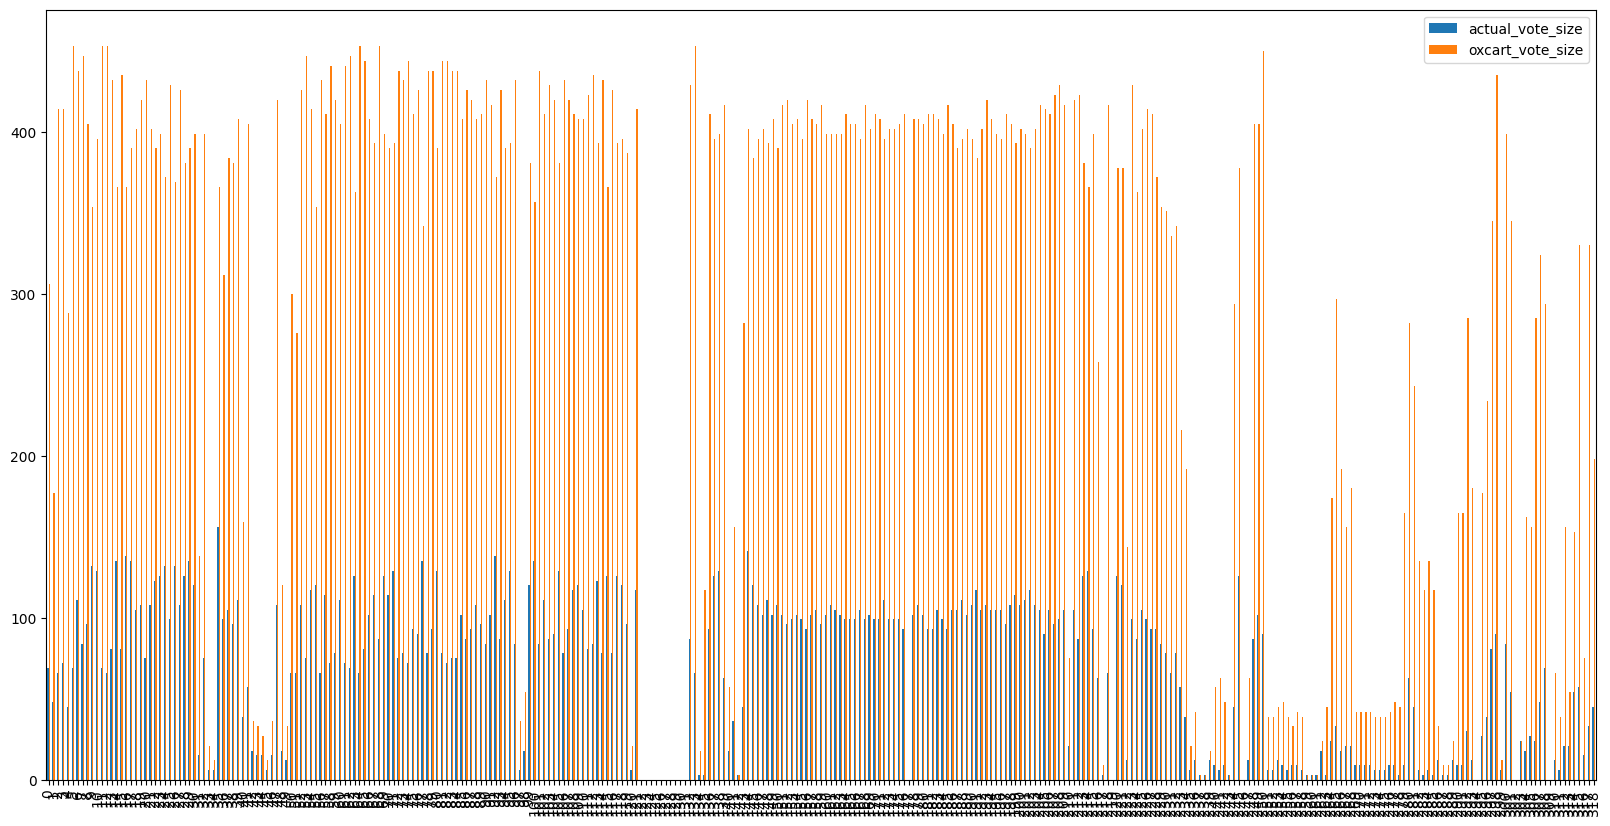

In [43]:
# plot as double bar chart
oxcart_proposals[['actual_vote_size', 'oxcart_vote_size']].plot(kind='bar', figsize=(20,10))

In [44]:
oxcart_proposals
# drop columns dao_id, body, choices, plugins, network, ipfs, link, privacy, flagged, scores, state, scores_by_strategy, scores_total, scores_updated, author, strategies, discussion, app
oxcart_proposals = oxcart_proposals.drop(columns=['dao_id', 'body', 'choices', 'plugins', 'network', 'ipfs', 'link', 'privacy', 'flagged', 'scores', 'state', 'scores_by_strategy', 'scores_total', 'scores_updated', 'author', 'strategies', 'discussion', 'app'])
oxcart_proposals

,proposal_id,actual_vote_size,oxcart_vote_size,created,title,start,ends,snapshot,votes,quorum
0,0xe07fb357b2b40e042ca58a36a1534afc33a1d313d478...,69,306,1.688064e+09,Arbitrum DAO Grants - Delegated Domain Allocat...,1688065200,1688670000,106202734,51622,0.0
1,0x5c0cecde14ec0b83c954b47c2d79348ce249019b8389...,48,177,1.693454e+09,Time Management in Arbitrum’s Governance,1693454450,1694059250,126581425,50713,0.0
2,0x6a578c12950f9367d2530b0324f06835bf9df5b957ad...,66,414,1.694022e+09,Domain Allocator Election for the Dev Tooling ...,1694022217,1694627017,128642925,49409,0.0
3,0x84e841ad47a5ac7eae2c8ee87c05abc381f8e724598d...,72,414,1.694023e+09,"Domain Allocator Election for the Education, C...",1694022779,1694627579,128644783,50003,0.0
4,0x14e71f784e880170972572c2696ef53ef437700c637a...,45,288,1.695813e+09,GovMonth Sensemaking - Reducing Friction,1695816000,1696420800,135081878,41213,0.0
...,...,...,...,...,...,...,...,...,...,...
314,0x4f6f6c1ba11de1122d5d5b8b098999610920fdc9c61a...,54,153,1.718921e+09,Multisig Support Service (MSS) Elections,1718920992,1719525792,223960708,35,0.0
315,0xd096c5d610d4455bcae4bff719d18345939c5d6b20d5...,57,330,1.721084e+09,Pilot for a Questbook Jumpstart fund for probl...,1721084359,1721689159,232612003,16,0.0
316,0xfd4085bda4daaa79445627ac2886656cdc1ef90cfbe0...,15,75,1.721292e+09,Gaming Catalyst Program (GCP) Council Voting,1721304000,1722513600,233438440,0,0.0
317,0x99b57df3577e8e6561f3549b057bd87fdb7e66f65a7c...,33,330,1.722555e+09,[Non-constitutional] Incentives Detox Proposal,1722556800,1723161600,238468087,1,0.0


In [45]:
#oxcart_proposals.to_sql('oxcart_analytics_proposals', conn_oxcart, if_exists='replace', index=False)